# Data Cleaning and EDA analysis.
For the second step, we do a cleaning of the dataset.

In [337]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import time
from datetime import date
import matplotlib.pyplot as plt


In [338]:
# Read the files
Avengers_2012 = pd.read_csv('Avengers_endgame_original.csv')
Avengers_Ultron = pd.read_csv('Avengers_ultron_original.csv')
Avengers_infinity = pd.read_csv('Avengers_infinity_original.csv')
Avengers_endgame = pd.read_csv('Avengers_endgame_original.csv')

Now we change date and rating data type to date and numerical type respectively.

In [339]:
# First, lets convert date type
Avengers_2012['date'] = pd.to_datetime(Avengers_2012['date'])
Avengers_Ultron['date'] = pd.to_datetime(Avengers_Ultron['date'])
Avengers_infinity['date'] = pd.to_datetime(Avengers_infinity['date'])
Avengers_endgame['date'] = pd.to_datetime(Avengers_endgame['date'])

In [340]:
#Now we change rate column to numeric type
Avengers_2012['rating']= Avengers_2012['rating'].apply(pd.to_numeric)
Avengers_Ultron['rating']= Avengers_Ultron['rating'].apply(pd.to_numeric)
Avengers_infinity['rating']= Avengers_infinity['rating'].apply(pd.to_numeric) 
Avengers_endgame['rating']= Avengers_endgame['rating'].apply(pd.to_numeric)

### Descriptive Statistics
Checking the stastitics for the datasets.

In [341]:
Avengers_2012.info()
Avengers_Ultron.info()
Avengers_infinity.info()
Avengers_endgame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4396 entries, 0 to 4395
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   review_title  4396 non-null   object        
 1   date          4396 non-null   datetime64[ns]
 2   content       3149 non-null   object        
 3   rating        4295 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 137.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   review_title  1449 non-null   object        
 1   date          1449 non-null   datetime64[ns]
 2   content       934 non-null    object        
 3   rating        1398 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 45.4+ KB
<class 'pandas.core.frame.DataFrame'>
Range

In [342]:
print("Descriptive Statistics before cleaning:")
print(" ")
print("Avengers 2012:", Avengers_2012.describe())
print("Avengers: Age of Ultron:", Avengers_Ultron.describe())
print("Avengers: Infinity War:", Avengers_infinity.describe())
print("Avengers: Endgame:", Avengers_endgame.describe())

Descriptive Statistics before cleaning:
 
Avengers 2012:             rating
count  4295.000000
mean      8.230035
std       2.476942
min       1.000000
25%       7.000000
50%      10.000000
75%      10.000000
max      10.000000
Avengers: Age of Ultron:             rating
count  1398.000000
mean      6.933476
std       2.311902
min       1.000000
25%       6.000000
50%       7.000000
75%       9.000000
max      10.000000
Avengers: Infinity War:             rating
count  4343.000000
mean      8.399954
std       2.413701
min       1.000000
25%       8.000000
50%       9.000000
75%      10.000000
max      10.000000
Avengers: Endgame:             rating
count  4295.000000
mean      8.230035
std       2.476942
min       1.000000
25%       7.000000
50%      10.000000
75%      10.000000
max      10.000000


In [343]:
# Average rating per movie

avg_2012= Avengers_2012['rating'].mean()
avg_ultron= Avengers_Ultron['rating'].mean()
avg_infinity= Avengers_infinity['rating'].mean()
avg_endgame = Avengers_endgame['rating'].mean()



print("Avengers 2012:", avg_2012)
print("Avengers: Age of Ultron:", avg_ultron)
print("Avengers: Infinity War:", avg_infinity)
print("Avengers: Endgame:", avg_endgame)


Avengers 2012: 8.230034924330617
Avengers: Age of Ultron: 6.9334763948497855
Avengers: Infinity War: 8.39995394888326
Avengers: Endgame: 8.230034924330617


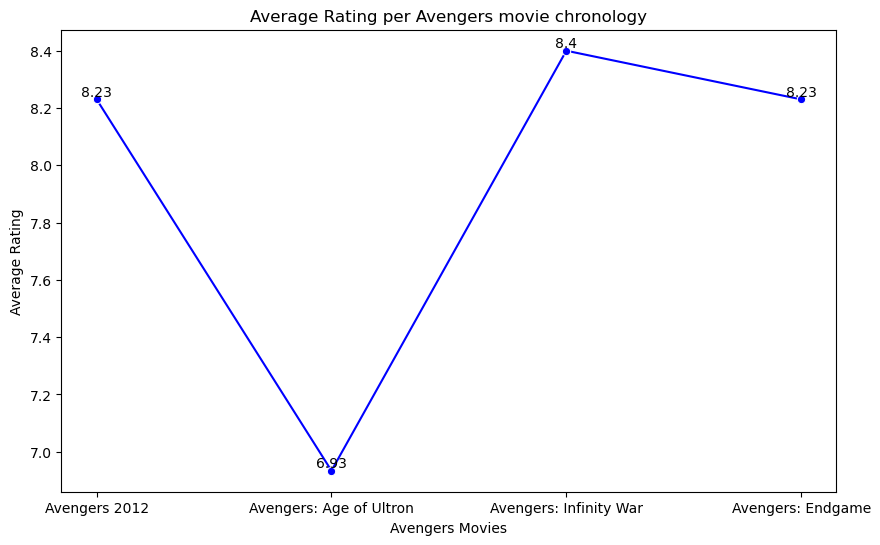

In [344]:
movies = ['Avengers 2012', 'Avengers: Age of Ultron', 'Avengers: Infinity War', 'Avengers: Endgame']
averages = [avg_2012, avg_ultron, avg_infinity, avg_endgame]

# Graph
sns.set_palette("Blues")
plt.figure(figsize=(10, 6))
sns.lineplot(x=movies, y=averages, marker='o', color='blue')
plt.xlabel('Avengers Movies')
plt.ylabel('Average Rating')
plt.title('Average Rating per Avengers movie chronology')

# Adding the values of the average ratings
for i, txt in enumerate(averages):
    plt.text(movies[i], averages[i], round(txt, 2), ha='center', va='bottom')
plt.show()

The movie with less average rating is **Avengers: Age of Ultron** with 6.93, which is also the movie wirth less reviews.

### Checking NAs

In [345]:
# Store the DataFrames in a dictionary
datasets = {
    "Avengers 2012": Avengers_2012, 
    "Avengers: Age of Ultron": Avengers_Ultron,
    "Avengers: Infinity War": Avengers_infinity,
    "Avengers: Endgame": Avengers_endgame
}

In [346]:
def check_for_nas(datasets):
    for name, df in datasets.items():
        nas_count = df.isnull().sum()
        total_nas = nas_count.sum()
        
        if total_nas > 0:
            print(f"There are {total_nas} NAs in the Dataset: {name}")
            print(nas_count)
        else:
            print(f"No NAs values found in the Dataset: {name}")

# Results
check_for_nas(datasets)

There are 1348 NAs in the Dataset: Avengers 2012
review_title       0
date               0
content         1247
rating           101
dtype: int64
There are 566 NAs in the Dataset: Avengers: Age of Ultron
review_title      0
date              0
content         515
rating           51
dtype: int64
There are 1155 NAs in the Dataset: Avengers: Infinity War
review_title       0
date               0
content         1105
rating            50
dtype: int64
There are 1348 NAs in the Dataset: Avengers: Endgame
review_title       0
date               0
content         1247
rating           101
dtype: int64


We will delete the NAs for ratings and for the reviews that doesnt have content, we will fill it with the content title. 

In [347]:
# Delete NAs from ratings
def drop_nas(datasets, column):
    for name, df in datasets.items():
        datasets[name] = df.dropna(subset=[column])
    return datasets

# Appying the function
datasets = drop_nas(datasets, 'rating')



In [348]:
# Delete NAs from ratings
def fill_nas(datasets, column):
    for name, df in datasets.items():
        datasets[name] = df.dropna(subset=[column])
    return datasets

# Appying the function
datasets = drop_nas(datasets, 'rating')

In [349]:
# Function to fill NAs in 'content' with values from 'review_title'
def fill_nas_with_review_title(datasets, content_column='content', review_title_column='review_title'):
    for name, df in datasets.items():
        df[content_column] = df[content_column].fillna(df[review_title_column])
        datasets[name] = df
    return datasets

# Apply the function to fill NAs
datasets = fill_nas_with_review_title(datasets)

# Show the results
for name, df in datasets.items():
    print(f"\n{name}:")
    print(df)


Avengers 2012:
                                    review_title       date  \
0                  Not as good as infinity war.. 2019-04-29   
1                       Emotional but bit messy. 2019-04-27   
2               The zenith of the MCU franchise. 2019-04-24   
3                           Crazy in every sense 2021-11-26   
4                   They had no right to do that 2019-04-26   
...                                          ...        ...   
4391  Two Endings and About a Half Hour Too Long 2019-04-30   
4392                                Lots of bugs 2019-05-01   
4393                           Whatever it takes 2019-04-24   
4394           The Cinematic Event of a Lifetime 2019-07-08   
4395             Epic, emotional, and satisfying 2019-05-01   

                                                content  rating  
0     But its a pretty good film. A bit of a mess in...     7.0  
1                              Emotional but bit messy.     7.0  
2     I feel like I'm wasting

In [350]:
# Function to check for Nas
def check_for_nas(datasets):
    for name, df in datasets.items():
        nas_count = df.isnull().sum()
        total_nas = nas_count.sum()
        
        if total_nas > 0:
            print(f"There are {total_nas} NAs in the Dataset: {name}")
            print(nas_count)
        else:
            print(f"No NAs values found in the Dataset: {name}")
            
# Appying the function
check_for_nas(datasets)

No NAs values found in the Dataset: Avengers 2012
No NAs values found in the Dataset: Avengers: Age of Ultron
No NAs values found in the Dataset: Avengers: Infinity War
No NAs values found in the Dataset: Avengers: Endgame


Since we dont have anymore NAs for the column **rating** but we still continue to have in the column **content**.

In [351]:
# Observing the number of observations
def print_num_observations(datasets):
    for name, df in datasets.items():
        print(f"Number of observations in {name}: {len(df)}")

# Results
print_num_observations(datasets)


Number of observations in Avengers 2012: 4295
Number of observations in Avengers: Age of Ultron: 1398
Number of observations in Avengers: Infinity War: 4343
Number of observations in Avengers: Endgame: 4295


## Reducing the dataset

Since the movie Avengers: Age of Ultron (2015) only have 1398 reviews, and the others one have more reviews each one, we will proceed to reduce those ones based on random selection. 

In [352]:
# Finding the dataset with minimun reviews
min_size = min(len(df) for df in datasets.values())

# Random selection to reduce the dataset to the minimun
def balance_datasets(datasets, size):
    for key, df in datasets.items():
        datasets[key] = df.sample(n=size, random_state=42).reset_index(drop=True)
    return datasets

# Aplying
datasets = balance_datasets(datasets, min_size)

# Observing the number of observations
def print_num_observations(datasets):
    for name, df in datasets.items():
        print(f"Number of observations in {name}: {len(df)}")

# Results
print_num_observations(datasets)


Number of observations in Avengers 2012: 1398
Number of observations in Avengers: Age of Ultron: 1398
Number of observations in Avengers: Infinity War: 1398
Number of observations in Avengers: Endgame: 1398


In [353]:
# Lets combine the datasets
combined_datasets = []
for name, df in datasets.items():
    df['movie'] = name  # Adding the movie column
    df = df[['movie'] + [col for col in df.columns if col != 'movie']] #showing as the first column
    combined_datasets.append(df)

combined_datasets = pd.concat(combined_datasets, ignore_index=True)
# Show
combined_datasets

,movie,review_title,date,content,rating
0,Avengers 2012,One word,2019-04-24,"""Perfect"" is the only thing I can say. Could n...",10.0
1,Avengers 2012,You intention recall an probability in imitati...,2020-07-10,You intention recall an probability in imitati...,10.0
2,Avengers 2012,A perfect send off,2019-05-25,A perfect send off,10.0
3,Avengers 2012,NAILED IT,2019-04-24,NAILED IT,10.0
4,Avengers 2012,Beautiful Symmetry,2019-04-29,"While no rabid Marvel comic book fan, I can sa...",10.0
...,...,...,...,...,...
5587,Avengers: Endgame,Least favorite of the 4 avengers films.,2019-04-29,Least favorite of the 4 avengers films.,6.0
5588,Avengers: Endgame,Meh?,2019-04-26,Meh?,7.0
5589,Avengers: Endgame,Avengers: Endgame! I love you 3000! This movie...,2019-05-09,Avengers: Endgame! I love you 3000! This movie...,9.0
5590,Avengers: Endgame,Speech less!!!!,2019-07-12,This movie is all That I wanted from a movie f...,10.0


### Cleaning the dataset

In [354]:
import re

def clean(text, remove_digits=True):
    # 1. Eliminar URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # 2. Reemplazar 'RT ' y '&amp;'
    text = text.replace('RT ', ' ').replace('&amp;', 'and')
    # 3. Eliminar caracteres especiales, excepto alfanuméricos
    if remove_digits:
        pattern = r'[^a-zA-Z\s]'
    else:
        pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern, '', text)
    # 4. Convertir a minúsculas
    text = text.lower()
    # 5. Eliminar menciones de Twitter, hashtags y emojis
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    # 6. Eliminar números
    if remove_digits:
        text = re.sub(r'\d+', '', text)
    return text

# Aplying
combined_datasets['content_cleaned'] = combined_datasets['content'].apply(lambda x: clean(x) if isinstance(x, str) else x)

# Show
combined_datasets

,movie,review_title,date,content,rating,content_cleaned
0,Avengers 2012,One word,2019-04-24,"""Perfect"" is the only thing I can say. Could n...",10.0,perfect is the only thing i can say could not ...
1,Avengers 2012,You intention recall an probability in imitati...,2020-07-10,You intention recall an probability in imitati...,10.0,you intention recall an probability in imitati...
2,Avengers 2012,A perfect send off,2019-05-25,A perfect send off,10.0,a perfect send off
3,Avengers 2012,NAILED IT,2019-04-24,NAILED IT,10.0,nailed it
4,Avengers 2012,Beautiful Symmetry,2019-04-29,"While no rabid Marvel comic book fan, I can sa...",10.0,while no rabid marvel comic book fan i can say...
...,...,...,...,...,...,...
5587,Avengers: Endgame,Least favorite of the 4 avengers films.,2019-04-29,Least favorite of the 4 avengers films.,6.0,least favorite of the avengers films
5588,Avengers: Endgame,Meh?,2019-04-26,Meh?,7.0,meh
5589,Avengers: Endgame,Avengers: Endgame! I love you 3000! This movie...,2019-05-09,Avengers: Endgame! I love you 3000! This movie...,9.0,avengers endgame i love you this movie is wor...
5590,Avengers: Endgame,Speech less!!!!,2019-07-12,This movie is all That I wanted from a movie f...,10.0,this movie is all that i wanted from a movie f...


### Additional process: NLTK

In [355]:
# Import libraries for additional cleaning
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Import NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dayan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dayan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dayan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [356]:
# Removing commonly used words in english.
common_words = stopwords.words('english')

In [357]:
def add_cleaning(text):
    if not isinstance(text, str):
        return text
    # 5. Token
    text_tokens = word_tokenize(text.replace('’', "").lower())
    # 6. Delete punctuation
    tokens_without_p = [w for w in text_tokens if w.isalpha()]
    # 7. Delete stopwords
    tokens_without_stopwords = [t for t in tokens_without_p if t not in common_words]
    # 8. Lemmatization
    text_clean = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_stopwords]
    # Joining tokens in one string
    return " ".join(text_clean)

In [358]:
# Applying the additional cleaning
combined_datasets['content_cleaned'] = combined_datasets['content_cleaned'].apply(lambda x: add_cleaning(x) if isinstance(x, str) else x)
combined_datasets

,movie,review_title,date,content,rating,content_cleaned
0,Avengers 2012,One word,2019-04-24,"""Perfect"" is the only thing I can say. Could n...",10.0,perfect thing say could imagine better ending
1,Avengers 2012,You intention recall an probability in imitati...,2020-07-10,You intention recall an probability in imitati...,10.0,intention recall probability imitation conscio...
2,Avengers 2012,A perfect send off,2019-05-25,A perfect send off,10.0,perfect send
3,Avengers 2012,NAILED IT,2019-04-24,NAILED IT,10.0,nailed
4,Avengers 2012,Beautiful Symmetry,2019-04-29,"While no rabid Marvel comic book fan, I can sa...",10.0,rabid marvel comic book fan say enjoyed avenge...
...,...,...,...,...,...,...
5587,Avengers: Endgame,Least favorite of the 4 avengers films.,2019-04-29,Least favorite of the 4 avengers films.,6.0,least favorite avenger film
5588,Avengers: Endgame,Meh?,2019-04-26,Meh?,7.0,meh
5589,Avengers: Endgame,Avengers: Endgame! I love you 3000! This movie...,2019-05-09,Avengers: Endgame! I love you 3000! This movie...,9.0,avenger endgame love movie worth watching day
5590,Avengers: Endgame,Speech less!!!!,2019-07-12,This movie is all That I wanted from a movie f...,10.0,movie wanted movie long time im still hypetrai...


In [359]:
# Save the clean datasets on CSV
combined_datasets_clean= combined_datasets.to_csv("combined_datasets_cleaned.csv", index=False)
combined_datasets_clean = pd.read_csv("combined_datasets_cleaned.csv") # reading

In [360]:
# checking again for NAs
empty_cells = combined_datasets_clean.isnull().sum()
print("NAs per column:")
print(empty_cells)

NAs per column:
movie               0
review_title        0
date                0
content             0
rating              0
content_cleaned    11
dtype: int64


In [361]:
# Lets observe
na_content_cleaned = combined_datasets_clean[combined_datasets_clean['content_cleaned'].isnull()]
print("Observations with NaN in the column 'content_cleaned' after saving data:")
print(na_content_cleaned[['movie', 'review_title', 'content', 'rating', 'content_cleaned']])

Observations with NaN in the column 'content_cleaned' after saving data:
                        movie review_title  \
238             Avengers 2012        🙏🙏🙏🙏🙏   
629             Avengers 2012           10   
1064            Avengers 2012    Not a 10!   
1717  Avengers: Age of Ultron        9/10!   
1933  Avengers: Age of Ultron       5.7/10   
2556  Avengers: Age of Ultron         Why?   
3865   Avengers: Infinity War         Why?   
4065   Avengers: Infinity War  9 out of 10   
4432        Avengers: Endgame        🙏🙏🙏🙏🙏   
4823        Avengers: Endgame           10   
5258        Avengers: Endgame    Not a 10!   

                                  content  rating content_cleaned  
238   🙏🙏🙏🙏🙏🙏💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓🙆🙆🙆🙆🙆     7.0             NaN  
629                                    10    10.0             NaN  
1064                            Not a 10!     7.0             NaN  
1717                                9/10!     9.0             NaN  
1933                              

In [362]:
# We will copy the review title to content_cleaned and we will proceed to the cleaning there. 

def fill_nas_with_review_title(df, content_column='content_cleaned', review_title_column='review_title'):
    df[content_column] = df[content_column].fillna(df[review_title_column])
    return df

# Aplicar la función
combined_datasets_cleaned = fill_nas_with_review_title(combined_datasets_clean)

# Verificar valores vacíos en 'content_cleaned' después de llenarlos
empty_cells_content_cleaned_after = combined_datasets_clean['content_cleaned'].isnull().sum()
print(f"NAs after filling: {empty_cells_content_cleaned_after}")

NAs after filling: 0


In [363]:
# Now will proceed again to clean them

def clean(text, remove_digits=True):
    # 1. Eliminar URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # 2. Reemplazar 'RT ' y '&amp;'
    text = text.replace('RT ', ' ').replace('&amp;', 'and')
    # 3. Eliminar caracteres especiales, excepto alfanuméricos
    if remove_digits:
        pattern = r'[^a-zA-Z\s]'
    else:
        pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern, '', text)
    # 4. Convertir a minúsculas
    text = text.lower()
    # 5. Eliminar menciones de Twitter, hashtags y emojis
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    # 6. Eliminar números
    if remove_digits:
        text = re.sub(r'\d+', '', text)
    return text

# Aplying
combined_datasets_clean['content_cleaned'] = combined_datasets_clean['content_cleaned'].apply(lambda x: clean(x) if isinstance(x, str) else x)

In [364]:
# Removing commonly used words in english.
common_words = stopwords.words('english')

def add_cleaning(text):
    if not isinstance(text, str):
        return text
    # 5. Token
    text_tokens = word_tokenize(text.replace('’', "").lower())
    # 6. Delete punctuation
    tokens_without_p = [w for w in text_tokens if w.isalpha()]
    # 7. Delete stopwords
    tokens_without_stopwords = [t for t in tokens_without_p if t not in common_words]
    # 8. Lemmatization
    text_clean = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_stopwords]
    # Joining tokens in one string
    return " ".join(text_clean)

# Applying the additional cleaning
combined_datasets_clean['content_cleaned'] = combined_datasets_clean['content_cleaned'].apply(lambda x: add_cleaning(x) if isinstance(x, str) else x)
combined_datasets_clean

,movie,review_title,date,content,rating,content_cleaned
0,Avengers 2012,One word,2019-04-24,"""Perfect"" is the only thing I can say. Could n...",10.0,perfect thing say could imagine better ending
1,Avengers 2012,You intention recall an probability in imitati...,2020-07-10,You intention recall an probability in imitati...,10.0,intention recall probability imitation conscio...
2,Avengers 2012,A perfect send off,2019-05-25,A perfect send off,10.0,perfect send
3,Avengers 2012,NAILED IT,2019-04-24,NAILED IT,10.0,nailed
4,Avengers 2012,Beautiful Symmetry,2019-04-29,"While no rabid Marvel comic book fan, I can sa...",10.0,rabid marvel comic book fan say enjoyed avenge...
...,...,...,...,...,...,...
5587,Avengers: Endgame,Least favorite of the 4 avengers films.,2019-04-29,Least favorite of the 4 avengers films.,6.0,least favorite avenger film
5588,Avengers: Endgame,Meh?,2019-04-26,Meh?,7.0,meh
5589,Avengers: Endgame,Avengers: Endgame! I love you 3000! This movie...,2019-05-09,Avengers: Endgame! I love you 3000! This movie...,9.0,avenger endgame love movie worth watching day
5590,Avengers: Endgame,Speech less!!!!,2019-07-12,This movie is all That I wanted from a movie f...,10.0,movie wanted movie long time im still hypetrai...


In [365]:
combined_datasets_clean= combined_datasets.to_csv("combined_datasets_cleaned.csv", index=False)
combined_datasets_clean = pd.read_csv("combined_datasets_cleaned.csv") # reading

In [366]:
# checking again for NAs
empty_cells = combined_datasets_clean.isnull().sum()
print("NAs per column:")
print(empty_cells)

NAs per column:
movie               0
review_title        0
date                0
content             0
rating              0
content_cleaned    11
dtype: int64


In [367]:
# Still there are NAs so we will proceed to delete them.
combined_datasets_clean = combined_datasets_clean.dropna(subset=['content_cleaned'])

# Verifying if there are still NAs
empty_cells_content_cleaned = combined_datasets_clean['content_cleaned'].isnull().sum()
print(f"NAs in 'content_cleaned': {empty_cells_content_cleaned}")

NAs in 'content_cleaned': 0


In [368]:
reviews_per_movie = combined_datasets_clean.groupby('movie').size().reset_index(name='count')

# Reviews per movie after deleting NAs
print("Reviews per movie after deleting NAs:")
print(reviews_per_movie)

Reviews per movie after deleting NAs:
                     movie  count
0            Avengers 2012   1395
1  Avengers: Age of Ultron   1395
2        Avengers: Endgame   1395
3   Avengers: Infinity War   1396


In [369]:
# we will randomly delete one observation from the last movie so it will be equal data

# Filter "Avengers: Infinity War" reviews
infinity_war_reviews = combined_datasets_clean[combined_datasets_clean['movie'] == 'Avengers: Infinity War']

# Random sampling selection
random_index = infinity_war_reviews.sample(n=1).index

# We delete that observation
combined_datasets_clean = combined_datasets_clean.drop(random_index)

# Verifying
reviews_per_movie_after = combined_datasets_clean.groupby('movie').size().reset_index(name='count')
print("Reviews per movie:")
print(reviews_per_movie_after)


Reviews per movie:
                     movie  count
0            Avengers 2012   1395
1  Avengers: Age of Ultron   1395
2        Avengers: Endgame   1395
3   Avengers: Infinity War   1395


# EDA Analysis

### Descriptive Statistics for clean datasets.
Checking the stastitics for the datasets including the categorical features.

In [370]:
print("Descriptive Statistics after cleaning:")
print(" ")
grouped_stats = combined_datasets_clean.groupby('movie').describe()
print(grouped_stats)

Descriptive Statistics after cleaning:
 
                         rating                                            \
                          count      mean       std  min  25%   50%   75%   
movie                                                                       
Avengers 2012            1395.0  8.149104  2.566335  1.0  7.0  10.0  10.0   
Avengers: Age of Ultron  1395.0  6.937634  2.307678  1.0  6.0   7.0   9.0   
Avengers: Endgame        1395.0  8.149104  2.566335  1.0  7.0  10.0  10.0   
Avengers: Infinity War   1395.0  8.390681  2.446571  1.0  8.0   9.0  10.0   

                               
                          max  
movie                          
Avengers 2012            10.0  
Avengers: Age of Ultron  10.0  
Avengers: Endgame        10.0  
Avengers: Infinity War   10.0  


In [371]:
# Rating per movie
grouped_category_counts = combined_datasets_clean.groupby(['rating', 'movie']).size().unstack(fill_value=0).reset_index()
grouped_category_counts['Total reviews'] = grouped_category_counts.sum(axis=1) #adding a total review count
grouped_category_counts

movie,rating,Avengers 2012,Avengers: Age of Ultron,Avengers: Endgame,Avengers: Infinity War,Total reviews
0,1.0,68,63,68,66,266.0
1,2.0,26,35,26,24,113.0
2,3.0,36,33,36,22,130.0
3,4.0,21,59,21,23,128.0
4,5.0,5,114,5,26,155.0
5,6.0,145,174,145,53,523.0
6,7.0,138,280,138,93,656.0
7,8.0,108,267,108,144,635.0
8,9.0,149,200,149,258,765.0
9,10.0,699,170,699,686,2264.0


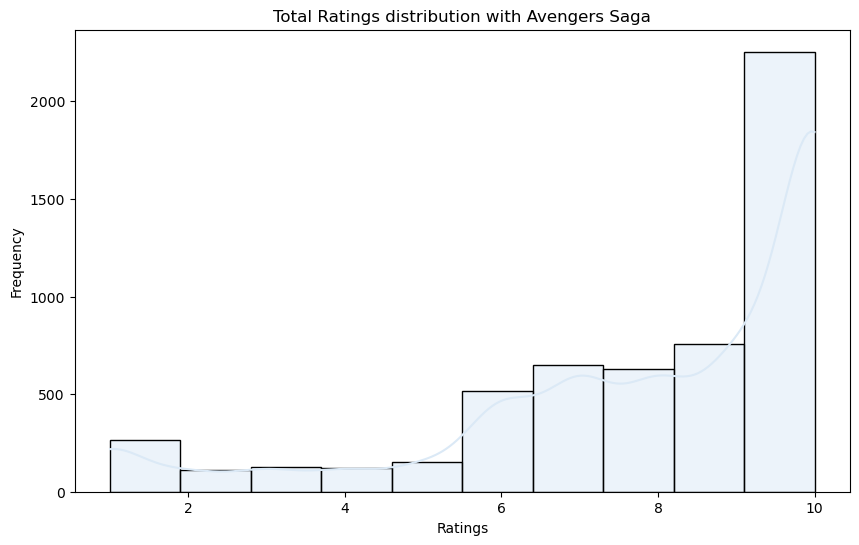

In [372]:
# Ratings distribution
plt.figure(figsize=(10, 6))
sns.histplot(combined_datasets_clean['rating'], bins=10, kde=True)
plt.title('Total Ratings distribution with Avengers Saga')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()


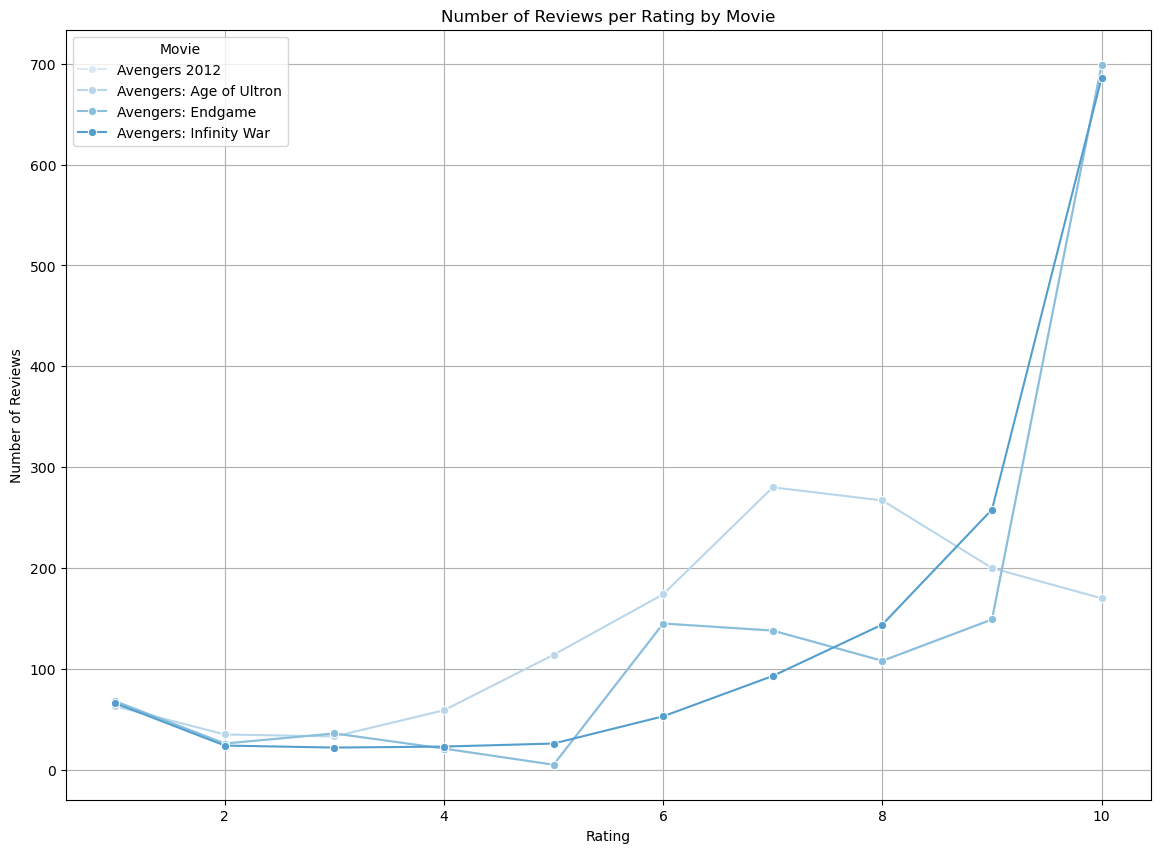

In [373]:
# Graph
plt.figure(figsize=(14, 10))
sns.set_palette("Blues")

for movie in grouped_category_counts.columns[1:-1]:
    sns.lineplot(data=grouped_category_counts, x='rating', y=movie, label=movie, marker='o')

plt.title('Number of Reviews per Rating by Movie')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.legend(title='Movie')
plt.grid(True)


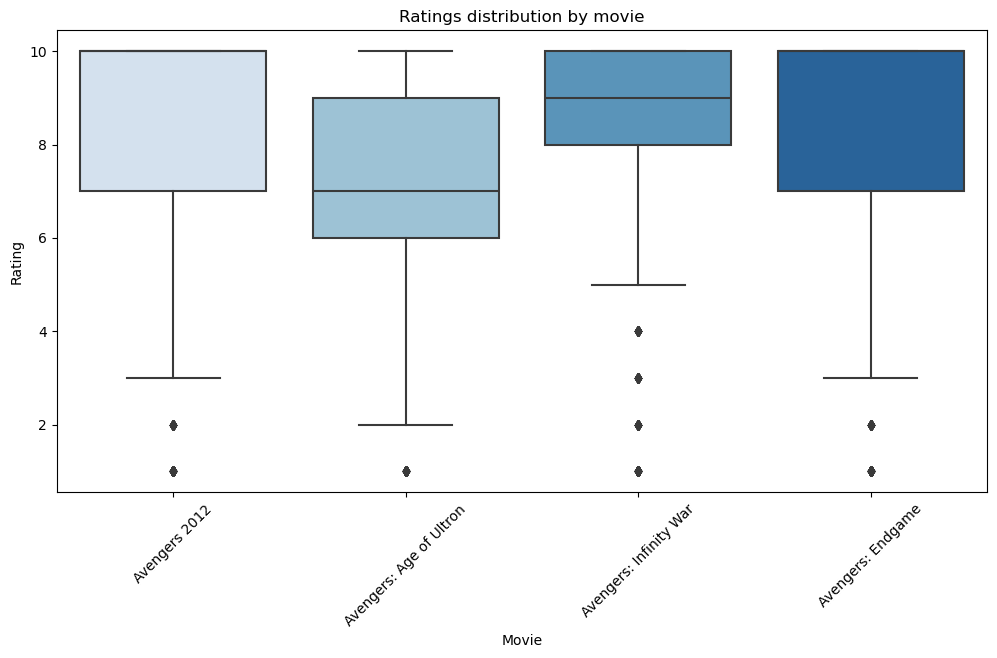

In [374]:
# Using a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='movie', y='rating', data=combined_datasets_clean, palette='Blues')
plt.title('Ratings distribution by movie')
plt.xlabel('Movie')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

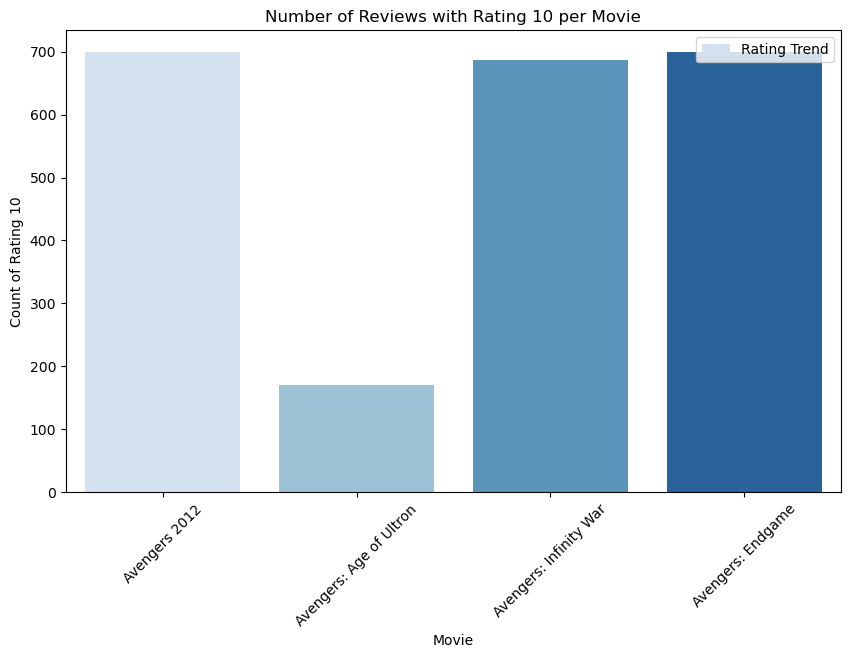

In [375]:
# Filtering the movies with rating 10
rating_10 = combined_datasets_clean[combined_datasets_clean['rating'] == 10]

# Graph
plt.figure(figsize=(10, 6))
sns.countplot(data=rating_10, x='movie', palette='Blues')
plt.title('Number of Reviews with Rating 10 per Movie')
plt.xlabel('Movie')
plt.ylabel('Count of Rating 10')
plt.xticks(rotation=45)
plt.grid(False)
plt.legend(['Rating Trend'], loc='upper right')
plt.show()

In [376]:
# Average rating
print("Average Ratings:", )
print(" ")
grouped_stats_ratings = combined_datasets_clean.groupby('movie')['rating'].mean().reset_index()
grouped_stats_ratings

Average Ratings:
 


,movie,rating
0,Avengers 2012,8.149104
1,Avengers: Age of Ultron,6.937634
2,Avengers: Endgame,8.149104
3,Avengers: Infinity War,8.390681


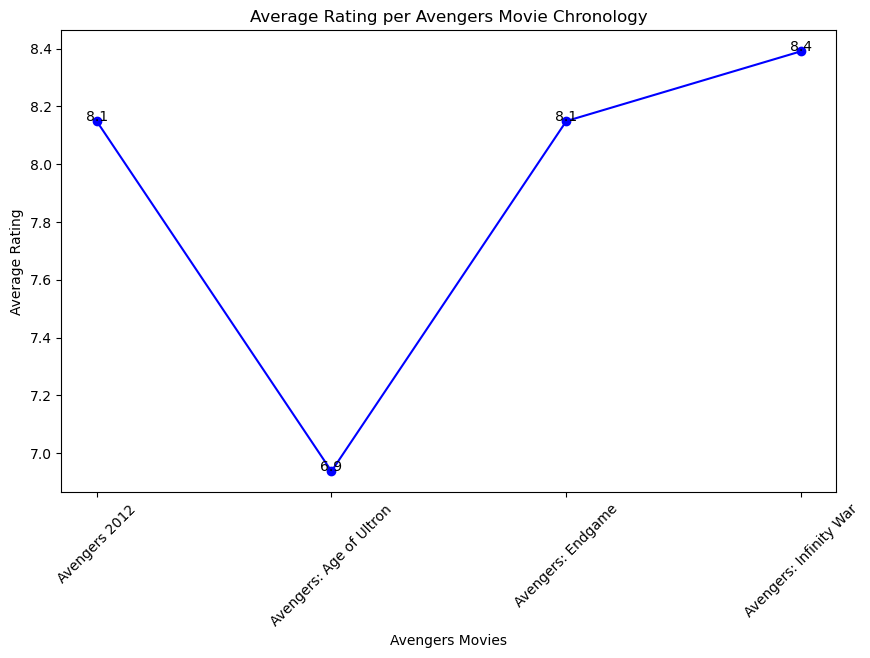

In [377]:
# Graph
plt.figure(figsize=(10, 6))
plt.plot(grouped_stats_ratings['movie'], grouped_stats_ratings['rating'], marker='o', color='blue')
plt.xlabel('Avengers Movies')
plt.ylabel('Average Rating')
plt.title('Average Rating per Avengers Movie Chronology')
plt.xticks(rotation=45)

# Añdding ratings point to see the changes
for i in range(len(grouped_stats_ratings)):
    plt.text(i, grouped_stats_ratings['rating'][i], f"{grouped_stats_ratings['rating'][i]:.1f}", ha='center')

plt.grid(False)
plt.show()

In [378]:
from scipy.stats import ttest_ind

# Lets compare the average difference
movie1_ratings = combined_datasets_clean[combined_datasets_clean['movie'] == 'Avengers 2012']['rating']
movie2_ratings = combined_datasets_clean[combined_datasets_clean['movie'] == 'Avengers: Age of Ultron']['rating']
movie3_ratings = combined_datasets_clean[combined_datasets_clean['movie']== 'Avengers: Infinity War']['rating']
movie4_ratings = combined_datasets_clean[combined_datasets_clean['movie'] == 'Avengers: Endgame']['rating']


# Applying t- student test between the first movie and the second one.
t_stat, p_value = ttest_ind(movie1_ratings, movie2_ratings)
print("t- student test between Avengers 2012 and Avengers: Age of Ultron:")
print("t statistic:", t_stat)
print("P value:", p_value)

# printing
if p_value <= 0.05:
    print("The results are statistically significant. There is a significant difference in the average ratings between 'Avengers 2012' and 'Avengers: Age of Ultron'.")
else:
    print("The results are not statistically significant. There is no evidence to suggest a difference in the average ratings between 'Avengers 2012' and 'Avengers: Age of Ultron'.")


t- student test between Avengers 2012 and Avengers: Age of Ultron:
t statistic: 13.110440814076652
P value: 3.767529418095987e-38
The results are statistically significant. There is a significant difference in the average ratings between 'Avengers 2012' and 'Avengers: Age of Ultron'.


In [379]:
# Lets compare the average difference between the first movie and the last one.
movie4_ratings = combined_datasets_clean[combined_datasets_clean['movie'] == 'Avengers: Infinity War']['rating']

# Applying t- student test
t_stat, p_value = ttest_ind(movie1_ratings, movie4_ratings)
print("t- student test between Avengers 2012 and Avengers: Infinity War:")
print("t statistic:", t_stat)
print("P value:", p_value)

# printing
if p_value <= 0.05:
    print("The results are statistically significant. There is a significant difference in the average ratings between 'Avengers 2012' and 'Avengers: Infinity War'.")
else:
    print("The results are not statistically significant. There is no evidence to suggest a difference in the average ratings between 'Avengers 2012' and 'Avengers: Infinity War'.")


t- student test between Avengers 2012 and Avengers: Infinity War:
t statistic: -2.5447455427371324
P value: 0.010989210749967155
The results are statistically significant. There is a significant difference in the average ratings between 'Avengers 2012' and 'Avengers: Infinity War'.


In [380]:
# Applying ANOVA
from scipy.stats import f_oneway
f_stat, p_value = f_oneway(movie1_ratings, movie2_ratings, movie3_ratings, movie4_ratings)

print("ANOVA:")
print("F statistic:", f_stat)
print("P value:", p_value)

# printing
if p_value <= 0.05:
    print("The results are statistically significant. At least one of the movies has a significantly different average rating.")
else:
    print("The results are not statistically significant. There is no evidence to suggest that the average ratings of the movies are different.")

ANOVA:
F statistic: 113.06371409131869
P value: 4.514133404994354e-71
The results are statistically significant. At least one of the movies has a significantly different average rating.


### Creating a new variable: sentiment rating.

To continue the process, we are going to create a new categorical variable with "rating" and clasifying it as: positive, neutral and negative.

In [381]:
# lets create a category for rating based on binary sentiment
def classify_sentiment_rating(rating):
    rating = int(rating)
    if rating >= 6:
        return 'positive'
    else:
        return 'negative'

combined_datasets_clean['bi_sentiment_rating'] = combined_datasets_clean['rating'].apply(classify_sentiment_rating)

In [382]:
# Checking how many reviews are under the rating sentiment category
grouped_category_sent = combined_datasets_clean.groupby(['movie', 'bi_sentiment_rating']).size().reset_index(name='count')
grouped_category_sent


,movie,bi_sentiment_rating,count
0,Avengers 2012,negative,156
1,Avengers 2012,positive,1239
2,Avengers: Age of Ultron,negative,304
3,Avengers: Age of Ultron,positive,1091
4,Avengers: Endgame,negative,156
5,Avengers: Endgame,positive,1239
6,Avengers: Infinity War,negative,161
7,Avengers: Infinity War,positive,1234


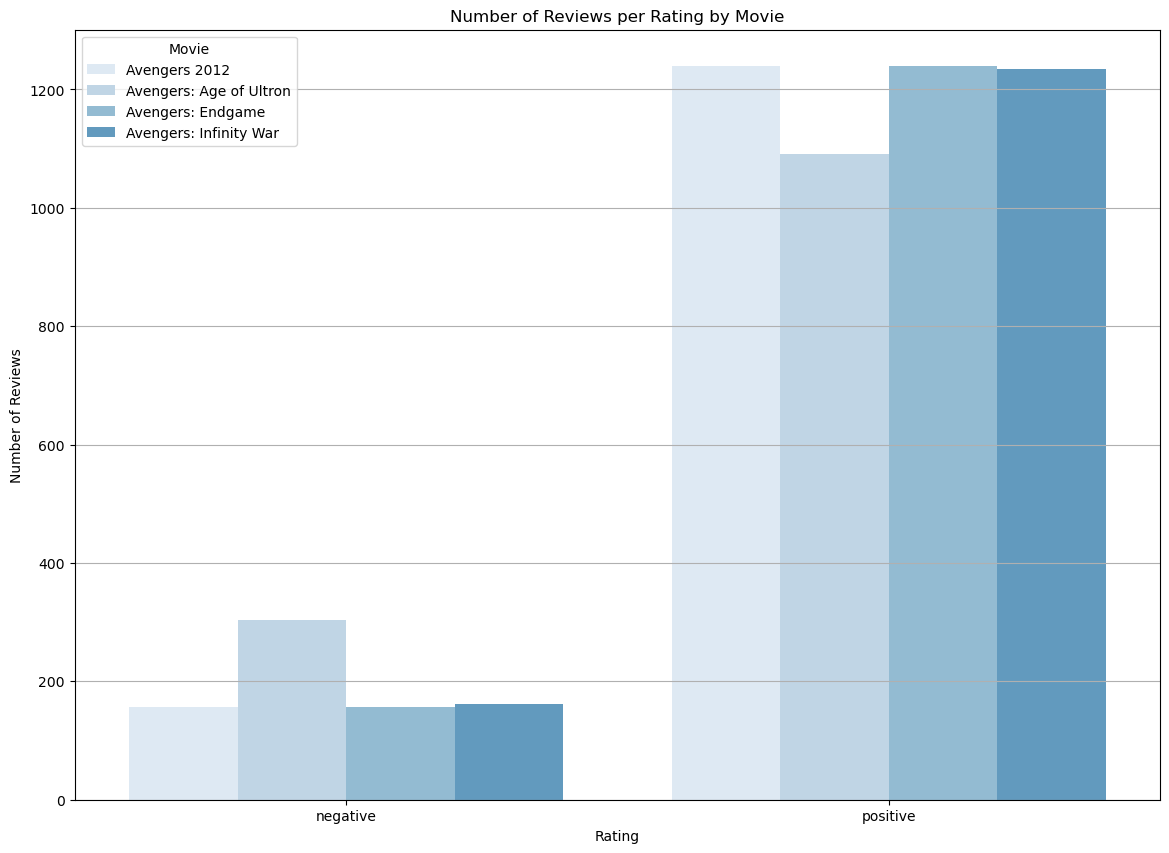

In [383]:

# Graph
plt.figure(figsize=(14, 10))
sns.set_palette("Blues")
sns.barplot(data=grouped_category_sent, x='bi_sentiment_rating', y='count', hue='movie')

plt.title('Number of Reviews per Rating by Movie')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.legend(title='Movie')
plt.grid(axis='y')
plt.show()


The Chi-2 test allows us to evaluate whether the ratings of the movies differ significantly among the various films beyond what is expected by chance. 

In [384]:
from scipy.stats import chi2_contingency

# Creating a contingency table
contingency_table = pd.crosstab(combined_datasets_clean['movie'], combined_datasets_clean['bi_sentiment_rating'])

# Chi-2 test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-2 test:")
print("Chi-2 statistic:", chi2_stat)
print("P value:", p_value)
print("Liberty degrees:", dof)
print("Table:\n", expected)

print("")
if p_value <= 0.05:
    print("The results are statistically significant. There is a significant association between movie and rating category.")
else:
    print("The results are not statistically significant. There is no evidence to suggest an association between movie and rating category.")

Chi-2 test:
Chi-2 statistic: 96.15211535261504
P value: 1.0440017507493607e-20
Liberty degrees: 3
Table:
 [[ 194.25 1200.75]
 [ 194.25 1200.75]
 [ 194.25 1200.75]
 [ 194.25 1200.75]]

The results are statistically significant. There is a significant association between movie and rating category.


This significant association and the low p-value could imply that certain movies are perceived consistently differently by viewers, resulting in distinct rating patterns. For example, one movie might consistently receive higher ratings, while another might have more mixed reviews. This indicates that also the ratings are not uniform, which indicate a change of perceptions between the viewers.

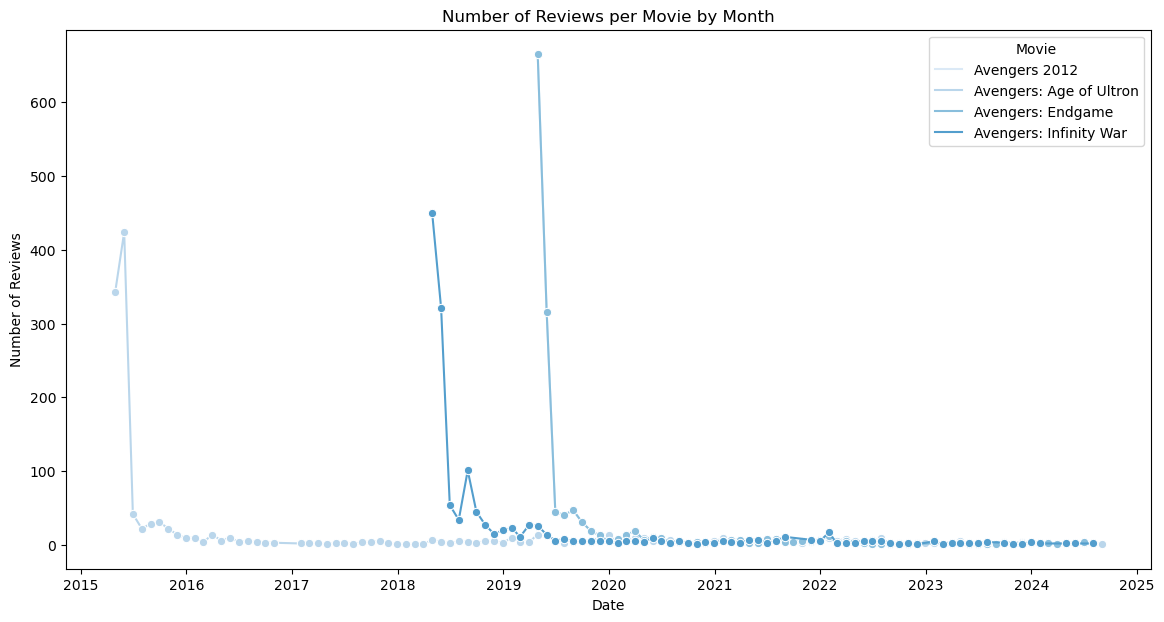

In [385]:
# Group by movie and by month to count the reviews
combined_datasets_clean['date'] = pd.to_datetime(combined_datasets_clean['date'])
review_counts = combined_datasets_clean.groupby(['movie', pd.Grouper(key='date', freq='M')]).size().reset_index(name='review_count')

# Graph
plt.figure(figsize=(14, 7))
sns.lineplot(data=review_counts, x='date', y='review_count', hue='movie', marker='o')
plt.title('Number of Reviews per Movie by Month')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.legend(title='Movie')
plt.grid(False)
plt.show()

In [386]:
# Finding the Date with more reviews for each movie
review_counts = combined_datasets_clean.groupby(['movie', 'date']).size().reset_index(name='review_count')
max_review_date = review_counts.loc[review_counts.groupby('movie')['review_count'].idxmax()]

# Results
print("Date with more reviews for each movie:")
print(max_review_date)

Date with more reviews for each movie:
                        movie       date  review_count
0               Avengers 2012 2019-04-24           143
351   Avengers: Age of Ultron 2015-04-26            63
896         Avengers: Endgame 2019-04-24           143
1239   Avengers: Infinity War 2018-04-27           116


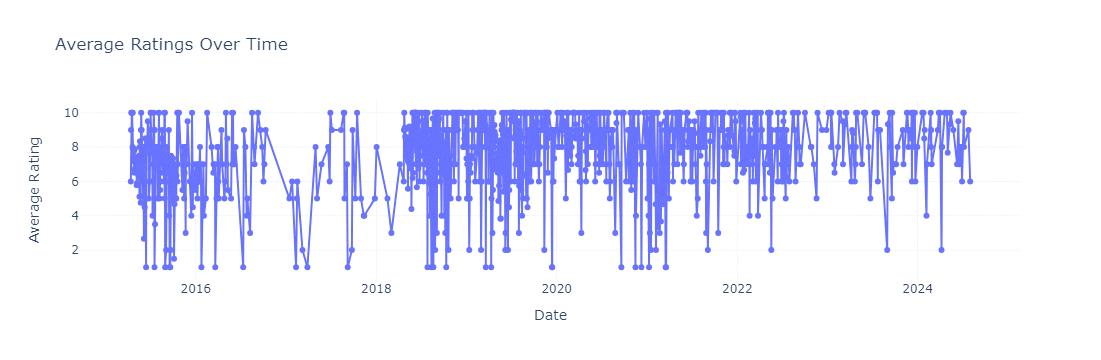

In [387]:
import plotly.graph_objects as go

# Calculating average rating by date
average_ratings_by_date = combined_datasets_clean.groupby('date')['rating'].mean().reset_index()

# Interactive Graph
fig = go.Figure()

fig.add_trace(go.Scatter(x=average_ratings_by_date['date'], y=average_ratings_by_date['rating'],
                         mode='lines+markers',
                         name='Average Rating'))

fig.update_layout(
    title='Average Ratings Over Time',
    xaxis_title='Date',
    yaxis_title='Average Rating',
    template='plotly_white'
)

fig.show()

In [388]:
# Save the clean datasets on CSV
combined_datasets_clean_final= combined_datasets_clean.to_csv("combined_datasets_cleaned_final.csv", index=False)
combined_datasets_clean_final